In [1]:
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid') 
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker 
import plotly.express as px 
import plotly.graph_objects as go 
import plotly.io as pio 
import plotly.colors as colors 
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder,MinMaxScaler

In [2]:
data= pd.read_csv("file_download.csv")

In [3]:
data

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,age_range
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,(60-70)
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,(20-30)
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,(60-70)
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,(60-70)
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,(30-40)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y,(80-90)
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y,(30-40)
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y,(30-40)
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y,(40-50)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
 14  age_range  1000 non-null   object 
dtypes: float64(8), int64(4), object(3)
memory usage: 117.3+ KB


In [5]:
data.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


## Analyse univariée

Percentage distribution of 'y':
 CLASS
Y    84.4
N    10.3
P     5.3
Name: proportion, dtype: float64


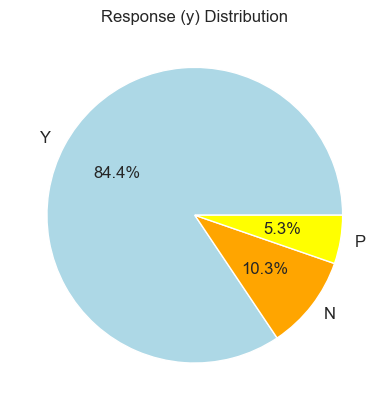

In [6]:
#Calculate the percentage distribution of 'y'
y_Class = data['CLASS'].value_counts(normalize=True) * 100 
print("Percentage distribution of 'y':\n", y_Class)

 # Optional pie chart visualization 
y_Class.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'orange','yellow'], labels=['Y','N','P'], fontsize=12)
plt.title('Response (y) Distribution')
plt.ylabel('') 
plt.show()

### La majeure partie des patients ont le diabéte

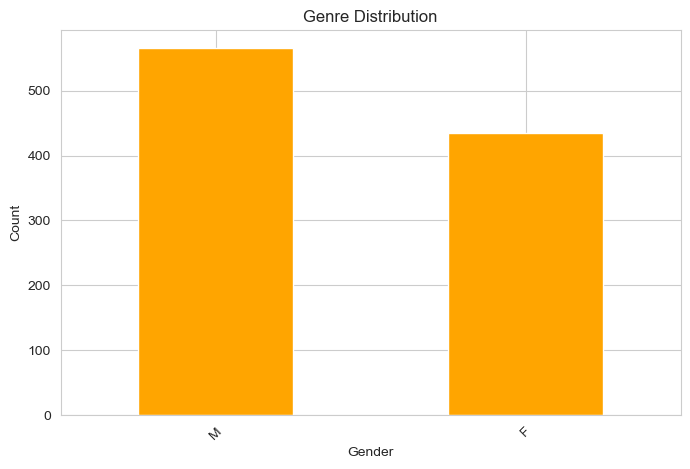

In [7]:
# Univariate analysis for gender 
plt.figure(figsize=(8, 5)) 

data['Gender'].value_counts().plot(kind='bar', color='orange') 
plt.title('Genre Distribution') 
plt.xlabel('Gender') 
plt.ylabel('Count') 
plt.xticks(rotation=45) 
plt.show()

### La majeure partie des patients examiner sont de sexe masculin

In [8]:
data[data["AGE"]==20]

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,age_range
979,177,45364,F,20,4.6,70,9.6,4.1,1.8,1.0,2.3,0.8,30.0,Y,(20-30)


In [9]:
data["AGE"].value_counts()

AGE
55    181
60     88
54     84
51     51
61     49
56     48
52     44
50     43
59     32
57     31
58     30
63     29
53     25
30     20
49     19
45     16
33     16
40     13
44     13
35     11
66     11
47     10
42     10
48     10
31      9
39      9
68      8
62      8
73      8
43      8
64      7
69      6
67      6
38      6
41      5
34      5
36      4
76      4
77      4
28      3
46      3
26      2
70      2
65      2
75      2
25      1
79      1
32      1
20      1
71      1
Name: count, dtype: int64

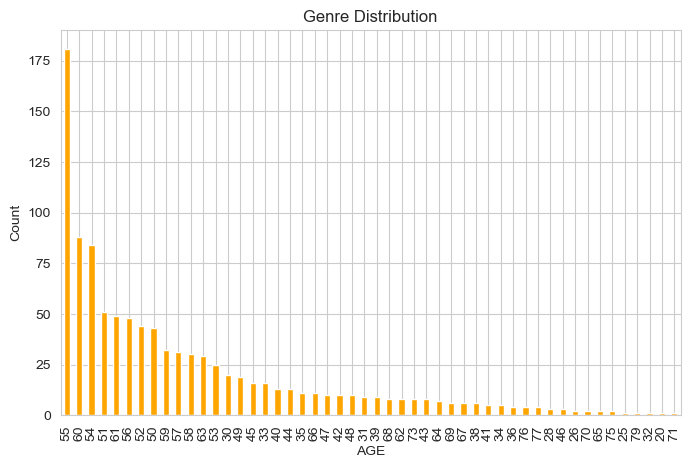

In [10]:
# Univariate analysis for AGE 
plt.figure(figsize=(8, 5)) 

data['AGE'].value_counts().plot(kind='bar', color='orange') 
plt.title('Genre Distribution') 
plt.xlabel('AGE') 
plt.ylabel('Count') 
plt.xticks(rotation=90) 
plt.show()

### L'age qui domine est de 55 ans

# Analyse bivariée

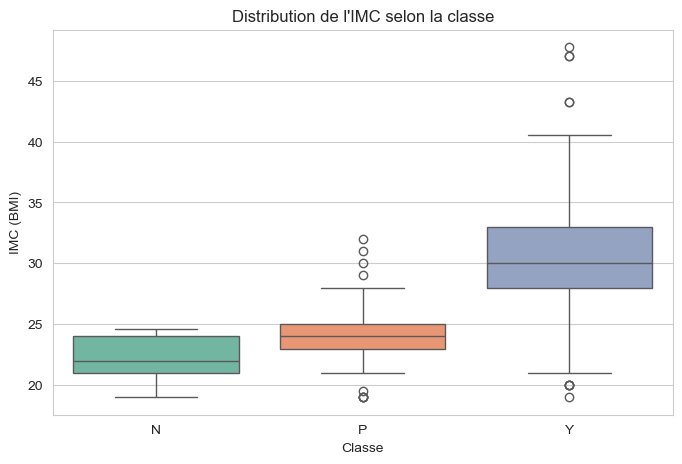

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='CLASS', y='BMI', data=data, hue='CLASS', palette="Set2", legend=False)
plt.title("Distribution de l'IMC selon la classe")
plt.xlabel("Classe")
plt.ylabel("IMC (BMI)")
plt.show()

##### La classe N présente un IMC normal, centré autour de 22, avec une distribution assez homogène. Cette population semble maintenir un poids santé relativement stable.La classe P montre une tendance au surpoids léger avec des IMC entre 23-24, et quelques cas isolés plus élevés. Cette population pourrait bénéficier d'une surveillance préventive pour éviter une progression vers l'obésité.La classe Y se distingue nettement avec des IMC beaucoup plus élevés (médiane vers 30) et une grande variabilité, allant jusqu'à des cas d'obésité sévère (IMC > 40). Cette dispersion importante suggère une population plus hétérogène nécessitant probablement des interventions médicales personnalisées.

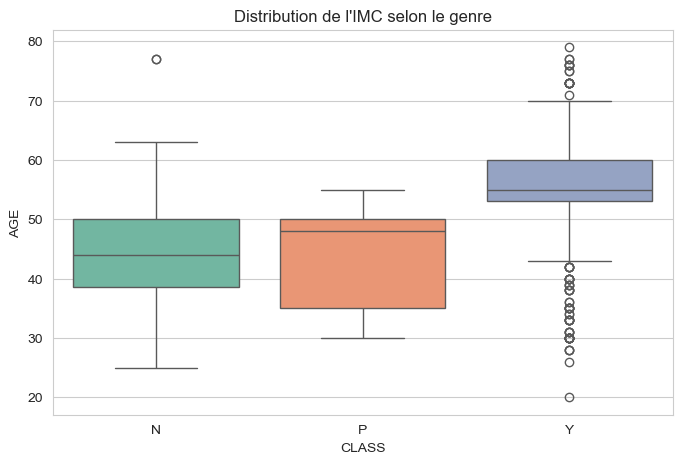

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='CLASS', y='AGE', data=data, hue='CLASS', palette="Set2", legend=False)
plt.title("Distribution de l'IMC selon le genre")
plt.xlabel("CLASS")
plt.ylabel("AGE")
plt.show()

### Analyse Multivariée

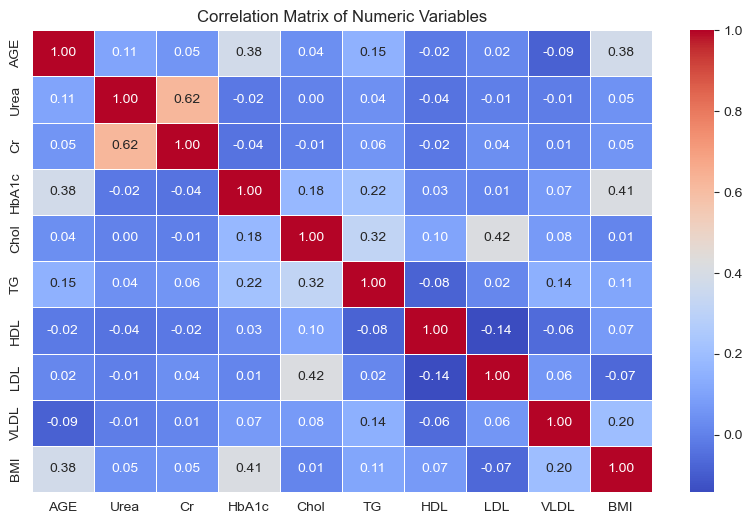

In [13]:
# Select only numeric columns 
numeric_data = data[['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG','HDL','LDL','VLDL','BMI']] 

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr() 
# Display the correlation matrix as a heatmap 
plt.figure(figsize=(10, 6)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5) 
plt.title('Correlation Matrix of Numeric Variables') 
plt.show()

## Feature Engeenering

In [14]:
data.isna().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
age_range    0
dtype: int64

In [15]:
data2 = data.drop(['ID','No_Pation','age_range'],axis=1)

In [16]:
data2.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  1000 non-null   object 
 1   AGE     1000 non-null   int64  
 2   Urea    1000 non-null   float64
 3   Cr      1000 non-null   int64  
 4   HbA1c   1000 non-null   float64
 5   Chol    1000 non-null   float64
 6   TG      1000 non-null   float64
 7   HDL     1000 non-null   float64
 8   LDL     1000 non-null   float64
 9   VLDL    1000 non-null   float64
 10  BMI     1000 non-null   float64
 11  CLASS   1000 non-null   object 
dtypes: float64(8), int64(2), object(2)
memory usage: 93.9+ KB


In [18]:
data2["Gender"].unique()

array(['F', 'M'], dtype=object)

In [19]:
data2["CLASS"].unique()

array(['N', 'P', 'Y'], dtype=object)

In [20]:
label1=LabelEncoder()
data2["CLASS"]=label1.fit_transform(data2["CLASS"])

In [21]:
data2["CLASS"].unique()

array([0, 1, 2])

In [22]:
data2["Gender"]=label1.fit_transform(data2["Gender"])

In [23]:
data2["Gender"].unique()

array([0, 1])

In [24]:
data2.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [25]:
scaler=MinMaxScaler() 
column_to_scale=['AGE','Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']

In [26]:
data2[column_to_scale] = scaler.fit_transform(data2[column_to_scale])

In [27]:
data2[column_to_scale].head()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0.508475,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
1,0.101695,0.104167,0.070529,0.264901,0.359223,0.081481,0.092784,0.187500,0.014327,0.139130
2,0.508475,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
3,0.508475,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
4,0.220339,0.171875,0.050378,0.264901,0.475728,0.051852,0.061856,0.177083,0.008596,0.069565


In [28]:
data_Gender_CLASS=data2[["Gender","CLASS"]]
data_Gender_CLASS.head()

,Gender,CLASS
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0


In [29]:
data3=pd.concat([data_Gender_CLASS,data2[column_to_scale]],axis=1)

In [30]:
data3.head()

,Gender,CLASS,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0,0,0.508475,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
1,1,0,0.101695,0.104167,0.070529,0.264901,0.359223,0.081481,0.092784,0.187500,0.014327,0.139130
2,0,0,0.508475,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
3,0,0,0.508475,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
4,1,0,0.220339,0.171875,0.050378,0.264901,0.475728,0.051852,0.061856,0.177083,0.008596,0.069565


In [31]:
data3["CLASS"].value_counts()

CLASS
2    844
0    103
1     53
Name: count, dtype: int64

In [32]:
# Split the dataset into features (X) and target (y)
X = data3.drop('CLASS', axis=1)
y = data3['CLASS']

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
X_train.shape

(800, 11)

In [36]:
X_test.shape

(200, 11)

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
random_forest=RandomForestClassifier()
random_model=random_forest.fit(X_train,y_train)


In [39]:
random_predict=random_model.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
precision = accuracy_score(y_test,random_predict)

In [42]:
precision

0.995

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.metrics._plot.confusion_matrix import confusion_matrix

In [44]:
cm = confusion_matrix(y_test, random_predict)

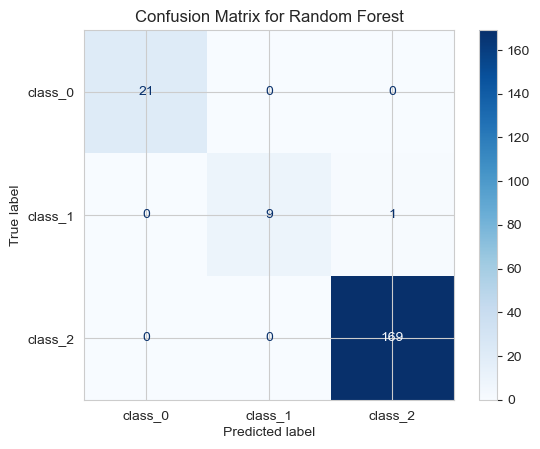

In [45]:
# Display confusion matrix with three labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['class_0', 'class_1', 'class_2'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.show()

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [47]:
# Initialize the KNeighborsClassifier with a specified number of neighbors
knn = KNeighborsClassifier(n_neighbors=10)  # You can change the number of neighbors

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn}")

# Classification report for detailed evaluation
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.945
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        21
           1       0.56      0.50      0.53        10
           2       0.98      0.98      0.98       169

    accuracy                           0.94       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.94      0.94      0.94       200



In [48]:
cm = confusion_matrix(y_test,y_pred_knn )

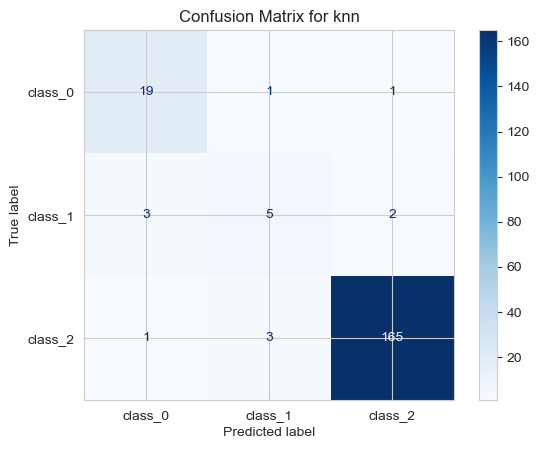

In [49]:
# Display confusion matrix with three labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['class_0', 'class_1', 'class_2'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for knn")
plt.show()

In [50]:
import gradio as gr
import joblib
import numpy as np
import pandas as pd

model = joblib.load('random_forest_model.pkl')
encoder = joblib.load('encoder.pkl')
scaler = joblib.load('scaler.pkl')

def predict(Gender, Age, Urea, Cr, HbA1c, Chol, TG, HDL, LDL, VLDL, BMI):
    try:
        data = {
            'Gender': Gender,
            'Age': Age,
            'Urea': Urea,
            'Cr': Cr,
            'HbA1c': HbA1c,
            'Chol': Chol,
            'TG': TG,
            'HDL': HDL,
            'LDL': LDL,
            'VLDL': VLDL,
            'BMI': BMI
        }
        
        df = pd.DataFrame([data])
        scaled_features = scaler.transform(df)
        prediction = model.predict(scaled_features)
        return f"Class {prediction[0]}"
    except Exception as e:
        return f"Error: {str(e)}"

with gr.Blocks() as interface:
    gr.Markdown("# Health Risk Prediction")
    
    with gr.Row():
        Gender = gr.Radio(choices=[0, 1], label="Gender (0=F, 1=M)")
        Age = gr.Number(label="Age", minimum=0)
        Urea = gr.Number(label="Urea")
        Cr = gr.Number(label="Cr")
    
    with gr.Row():
        HbA1c = gr.Number(label="HbA1c")
        Chol = gr.Number(label="Cholesterol")
        TG = gr.Number(label="Triglycerides")
        HDL = gr.Number(label="HDL")
    
    with gr.Row():
        LDL = gr.Number(label="LDL")
        VLDL = gr.Number(label="VLDL")
        BMI = gr.Number(label="BMI")
    
    predict_btn = gr.Button("Predict")
    output = gr.Textbox(label="Prediction Result")
    
    predict_btn.click(
        fn=predict,
        inputs=[Gender, Age, Urea, Cr, HbA1c, Chol, TG, HDL, LDL, VLDL, BMI],
        outputs=output
    )

interface.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
